In [1]:
import pandas
from keras.models import Sequential,Model
from keras import losses
from keras.layers import Dense,Activation,LSTM
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils.conv_utils import convert_kernel

from random import seed
from random import choice

%matplotlib inline 
#to plot inline in jupyter notebook  
import numpy as np #for array related 
import scipy.io as spio #to load data 
import cmath #for complex operations
import matplotlib.pyplot as plt #for plotting graphs
import math # for log 
from scipy.signal import hann, welch #for spectral analysis
import keras.backend as K
import tensorflow as tf
import tensorflow.contrib.eager as tfe
from tensorflow.python.eager.context import context, EAGER_MODE, GRAPH_MODE

Using TensorFlow backend.


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
def load_data(x):
    train_len = 8000
    
    y_train = Non_Linearity(x[0:train_len])
    x_train = x[0:train_len]
    
    x_test = Non_Linearity(x[len(ip)-2000:])
    y_test = x[len(ip)-2000:]
    
    return (x_train,y_train,x_test,y_test)

In [4]:
def Convert2Feature(input):
	output = [(np.real(i),np.imag(i)) for i in input]
	return np.array(output).reshape(-1,2)

def Convert2Complex(input):
	return np.array([t[0]+1j*t[1] for t in np.array(input)])

def Non_Linearity(input):
	output = input-0.1*input*(np.abs(input)**2)
	return output


def Generate_Data():
	x_train=np.array([np.random.choice([-1,1]) for i in range(2000) ])
	#x_train=x_train.reshape(-1,2)
	y_train=Non_Linearity(x_train)
	
	x_test=np.array([np.random.choice([-1,1]) for i in range(2000) ])
	#x_test=x_test.reshape(-1,2)
	y_test=Non_Linearity(x_test)

	return (x_train,y_train,x_test,y_test)

x_train,y_train,x_test,y_test = Generate_Data()

model = Sequential()
model.add(Dense(units=2000, input_dim=1))
model.add(Activation('relu'))
model.add(Dense(units=100))
model.add(Activation('tanh'))
model.add(Dense(units=10))
model.add(Activation('linear'))
model.add(Dense(units=1))

ans = model.compile(loss='mean_squared_error',
              optimizer='adam')
model.fit(y_train, x_train, epochs=75, batch_size=100, verbose=1)


Epoch 1/75
2000/2000 [==============================] - 0s 173us/step - loss: 0.1313
Epoch 2/75
2000/2000 [==============================] - 0s 99us/step - loss: 0.0082
Epoch 3/75
2000/2000 [==============================] - 0s 121us/step - loss: 0.0011
Epoch 4/75
2000/2000 [==============================] - 0s 95us/step - loss: 1.6153e-04
Epoch 5/75
2000/2000 [==============================] - 0s 124us/step - loss: 2.5969e-05
Epoch 6/75
2000/2000 [==============================] - 0s 90us/step - loss: 3.9284e-06
Epoch 7/75
2000/2000 [==============================] - 0s 116us/step - loss: 3.5445e-07
Epoch 8/75
2000/2000 [==============================] - 0s 132us/step - loss: 6.8083e-08
Epoch 9/75
2000/2000 [==============================] - 0s 107us/step - loss: 7.8584e-09
Epoch 10/75
2000/2000 [==============================] - 0s 96us/step - loss: 7.6550e-10
Epoch 11/75
2000/2000 [==============================] - 0s 106us/step - loss: 1.0022e-10
Epoch 12/75
2000/2000 [============

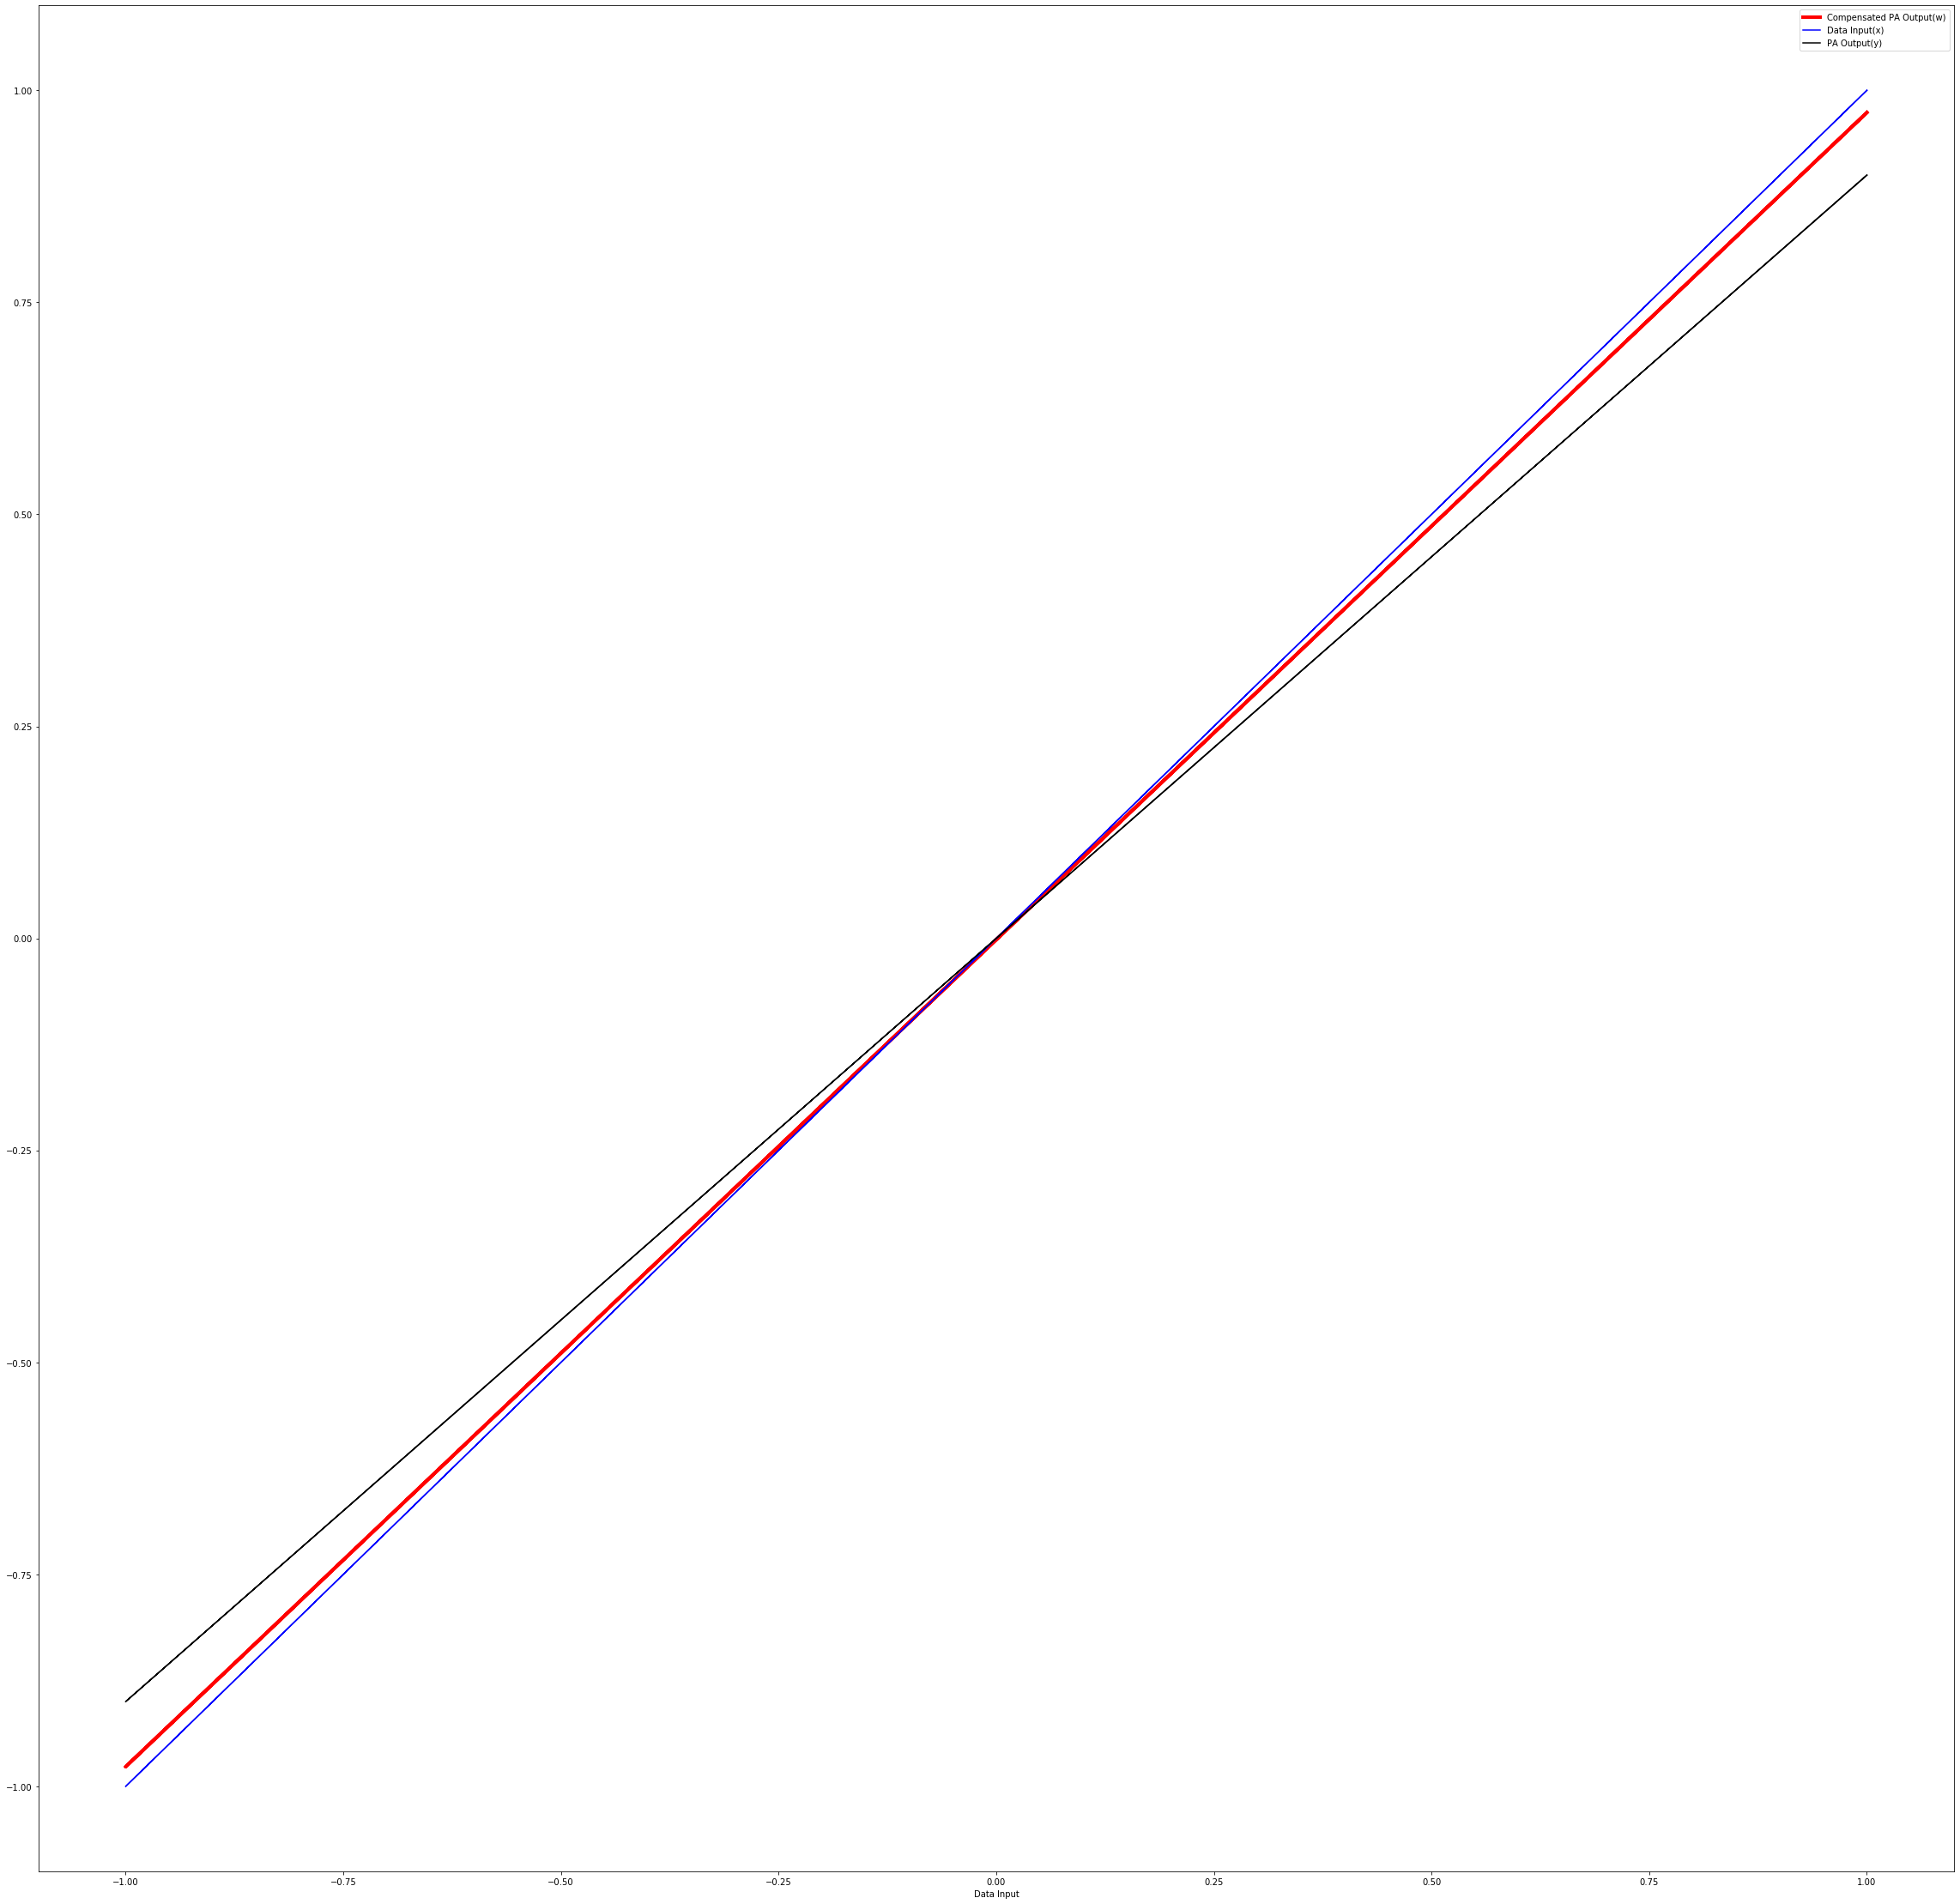

In [20]:
classes = model.predict(x_test, batch_size=1)
plt.figure()

plt.plot(x_test, Non_Linearity(classes),c='r',label = 'Compensated PA Output(w)',linewidth = 4)
plt.plot(x_test,x_test,c='b',label = 'Data Input(x)')
plt.plot(x_test,Non_Linearity(x_test),c='k',label = 'PA Output(y)')
plt.xlabel('Data Input')
plt.legend()

plt.show()